In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Load data

In [2]:
exp = np.load("I_q_IPA_exp.npy") ; print(exp.shape)
mod = np.load("I_q_IPA_model.npy")
print(mod.shape)

(256, 2)
(48, 2)


In [3]:
print(exp[0,0], exp[-1,0])
print(mod[0,0], mod[-1,0])

0.0 18.620778239062993
0.0 59.06194


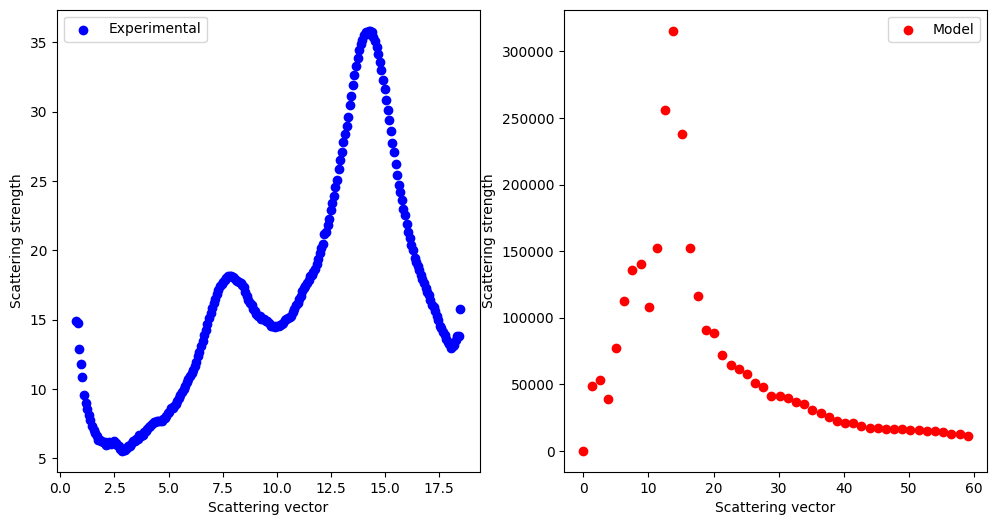

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x=exp[:,0],y=exp[:,1],color="b",label="Experimental")
ax[0].legend()

ax[1].scatter(x=mod[:,0],y=mod[:,1],color="r",label="Model")
plt.setp(ax,xlabel="Scattering vector",ylabel="Scattering strength",label="Model")
ax[1].legend()
plt.show()

### Scale the points from the theoretical model to give the best possible fit to the experimental dataset

#### Restrict the model data to the experimental data range in the x-direction

In [5]:
x_max_exp = np.max(exp[:,0]) ; print(x_max_exp)

# Filter model data to keep only points within the experimental range
mod_filtered = mod[mod[:, 0] <= x_max_exp] ; print(mod_filtered.shape)

18.620778239062993
(15, 2)


#### Interpolate the model data

In [6]:
from scipy.interpolate import interp1d
# Create an interpolation function for the model data
interp_func = interp1d(mod_filtered[:, 0], mod_filtered[:, 1], kind='linear', fill_value="extrapolate")

# Evaluate the model at the experimental x-values
mod_interpolated = interp_func(exp[:, 0])

# Print some checks
print(f"Interpolated model now has {len(mod_interpolated)} points (same as experimental data).")

Interpolated model now has 256 points (same as experimental data).


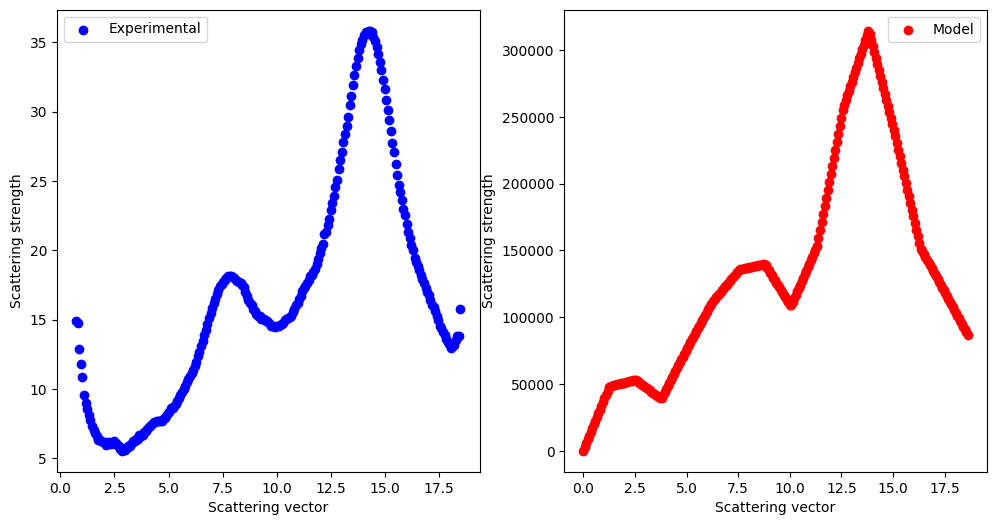

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x=exp[:,0],y=exp[:,1],color="b",label="Experimental")
ax[0].legend()

ax[1].scatter(x=exp[:,0],y=mod_interpolated,color="r",label="Model")
plt.setp(ax,xlabel="Scattering vector",ylabel="Scattering strength",label="Model")
ax[1].legend()
plt.show()

#### Now, we have data of equal lengths at the same values of x, allowing for direct comparison

#### Define an error function, e.g. sum of squared differences between the two data sets

In [8]:
def error_scattering(scaling_factor):

    # Find and exclude the NaN values in the experimental data
    not_nans = ~np.isnan(exp[:,1]) 
    
    # Compute the difference between experimental- and model data
    differences = exp[not_nans,1] - (scaling_factor * mod_interpolated[not_nans])
    return np.sum(differences ** 2)

#### Optimize for the best scaling factor, using scipy

In [9]:
from scipy.optimize import minimize_scalar
optimal_scaling_factor = minimize_scalar(error_scattering, bounds=(1e-5,1e-1), method="bounded")
print("Optimal scaling factor:", optimal_scaling_factor.x)

Optimal scaling factor: 0.00011558853851319754


## Visualize the best scaling

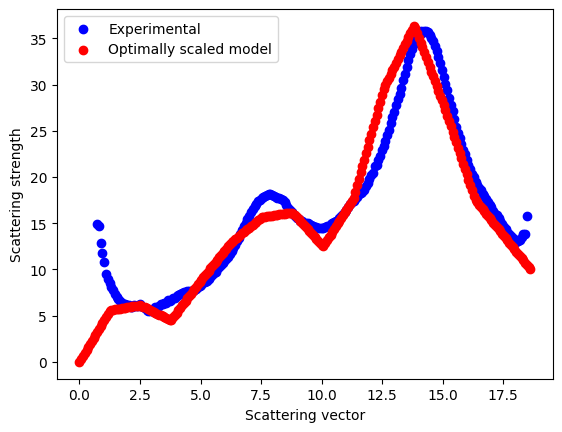

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=exp[:,0],y=exp[:,1],color="b",label="Experimental")
ax.scatter(x=exp[:,0],y=optimal_scaling_factor.x*mod_interpolated,color="r",label="Optimally scaled model")
ax.set_xlabel("Scattering vector")
ax.set_ylabel("Scattering strength")
ax.legend()
plt.show()